INFO6105 Instructor: Dr. Handan Liu

Homework 4

Grading: total 100 points


In [134]:
# Required Packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets # for importing Iris dataset
from sklearn.svm import SVC #support vector classifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [21]:
# import iris data to model Svm classifier (3 points)
iris = datasets.load_iris()

In [22]:
# Using the DESCR key (description) over the iris_dataset to describ the dataset (3 points)
print ("Description of the Iris Dataset: ", iris['DESCR'])

Description of the Iris Dataset:  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== =

In [23]:
# To get the iris features and the target classes (3 points)
print ("Iris features: ", iris['data'])

Iris features:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1

In [24]:
# To check the target data (3 points)
print ("Iris target: ", iris['target'])

Iris target:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


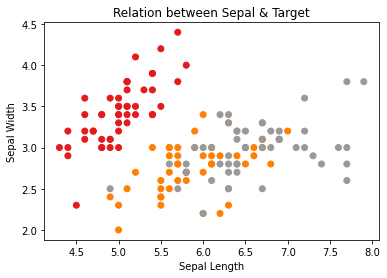

In [25]:
X_sepal = iris.data[:, :2]  # Sepal Length, Sepal Width Features 
y = iris.target
plt.scatter(X_sepal[:, 0], X_sepal[:, 1], c=y, cmap=plt.cm.Set1)
plt.title('Relation between Sepal & Target')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

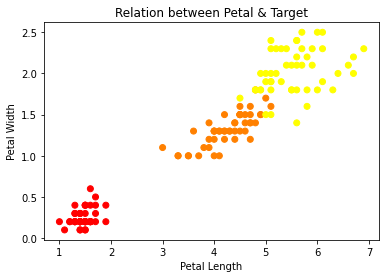

In [26]:
X_petal = iris.data[:, 2:]  # Petal Length, Petal Width Features
y = iris.target
plt.scatter(X_petal[:, 0], X_petal[:, 1], c=y, cmap='autumn')
plt.title('Relation between Petal & Target')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [202]:
# setting X and y
X_sepal = iris.data[:, :2]  # Sepal Length, Sepal Width Features
y = iris.target

In [230]:
# splitting the data into training n testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sepal, y, test_size = 0.25, random_state = 4)

In [231]:
# Training SVM Linear Kernel model on trainig set
model_linear = SVC(kernel = 'linear', C = 1)
model_linear.fit(X_train, y_train)

# Training SVM RBF Kernel model on trainig set
model_rbf = SVC(kernel = 'rbf', C = 1, gamma = 'auto')
model_rbf.fit(X_train, y_train)

# Training SVM Polynomial (Degree=3) Kernel model on trainig set
model_poly = SVC(kernel = 'poly', C = 1, degree = 3)
model_poly.fit(X_train, y_train)


SVC(C=1, kernel='poly')

In [232]:
def visualize_SVMClassifier(model, X, y, title, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    ax.set_title(title)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

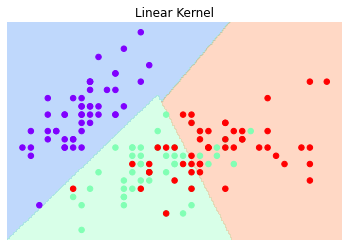

In [233]:
# Plot to describe Iris Feature with SVC with Linear Kernel
visualize_SVMClassifier(model_linear, X_sepal, y, 'Linear Kernel')

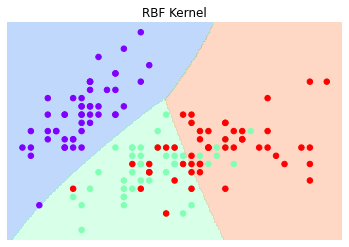

In [234]:
# Plot to describe Iris Feature with SVC with RBF Kernel
visualize_SVMClassifier(model_rbf, X_sepal, y, 'RBF Kernel')

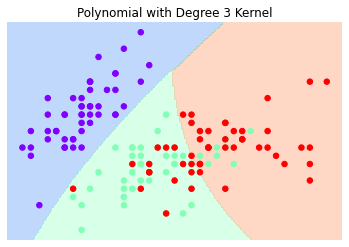

In [235]:
# Plot to describe Iris Feature with SVC with Polynomial Kernel
visualize_SVMClassifier(model_poly, X_sepal, y, 'Polynomial with Degree 3 Kernel')

In [236]:
# prediction
y_pred1 = model_linear.predict(X_test)
y_pred2 = model_rbf.predict(X_test)
y_pred3 = model_poly.predict(X_test)

In [237]:
# Confusion Matrix and Accuracy of Liner Kernel on Predicting Iris Sepal Features
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
accuracy_score(y_test, y_pred1)

[[18  0  0]
 [ 0  8  0]
 [ 0  4  8]]


0.8947368421052632

In [238]:
# Accuracy of Liner Kernel on Training Data
model_linear.score(X_sepal,y)

0.82

In [239]:
# Confusion Matrix and Accuracy of RBF Kernel on Predicting Iris Sepal Features
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
accuracy_score(y_test, y_pred2)

[[18  0  0]
 [ 0  8  0]
 [ 0  3  9]]


0.9210526315789473

In [240]:
# Accuracy of RBF Kernel on Trainig Data
model_poly.score(X_sepal,y)

0.8133333333333334

In [241]:
# Confusion Matrix and Accuracy of Polynomial Kernel on Predicting Iris Sepal Features
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
accuracy_score(y_test, y_pred3)

[[18  0  0]
 [ 0  8  0]
 [ 0  4  8]]


0.8947368421052632

In [242]:
# Accuracy of Polynomial Kernel on Trainig Data
model_rbf.score(X_sepal,y)

0.8266666666666667

In [243]:
# setting X and y
X_petal = iris.data[:, 2:]  # Petal Length, Petal Width Features
y = iris.target

In [244]:
# splitting the data into training n testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_petal, y, test_size = 0.25, random_state = 4)

In [245]:
# Training SVM Linear Kernel model on trainig set
model_linear = SVC(kernel = 'linear', C = 1)
model_linear.fit(X_train, y_train)

# Training SVM RBF Kernel model on trainig set
model_rbf = SVC(kernel = 'rbf', C = 1, gamma = 'auto')
model_rbf.fit(X_train, y_train)

# Training SVM Polynomial (Degree=3) Kernel model on trainig set
model_poly = SVC(kernel = 'poly', C = 1, degree = 3)
model_poly.fit(X_train, y_train)


SVC(C=1, kernel='poly')

In [246]:
def visualize_SVMClassifier(model, X, y, title, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    ax.set_title(title)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)


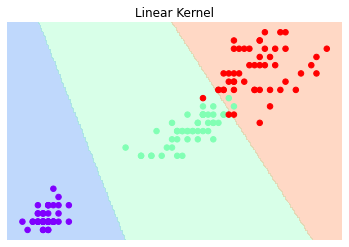

In [247]:
# Plot to describe Iris Feature with SVC with Linear Kernel
visualize_SVMClassifier(model_linear, X_petal, y, 'Linear Kernel')

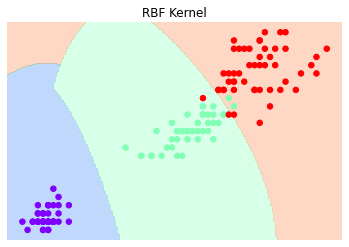

In [248]:
# Plot to describe Iris Feature with SVC with RBF Kernel
visualize_SVMClassifier(model_rbf, X_petal, y, 'RBF Kernel')

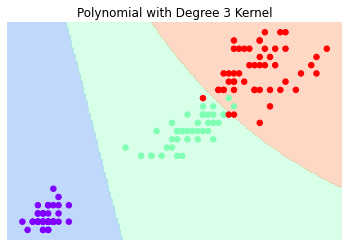

In [249]:
# Plot to describe Iris Feature with SVC with Polynomial Kernel
visualize_SVMClassifier(model_poly, X_petal, y, 'Polynomial with Degree 3 Kernel')

In [250]:
# prediction
y_pred1 = model_linear.predict(X_test)
y_pred2 = model_rbf.predict(X_test)
y_pred3 = model_poly.predict(X_test)

In [251]:
# Confusion Matrix and Accuracy of Liner Kernel on Predicting Iris Petal Features
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
accuracy_score(y_test, y_pred1)

[[18  0  0]
 [ 0  7  1]
 [ 0  0 12]]


0.9736842105263158

In [252]:
# Accuracy of Liner Kernel on Training data
model_linear.score(X_petal,y)

0.9666666666666667

In [253]:
# Confusion Matrix and Accuracy of RBF Kernel on Predicting Iris Petal Features
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
accuracy_score(y_test, y_pred2)

[[18  0  0]
 [ 0  7  1]
 [ 0  0 12]]


0.9736842105263158

In [256]:
#Accuracy of RBF Kernelon Training data
model_rbf.score(X_petal,y)

0.9666666666666667

In [257]:
# Confusion Matrix and Accuracy of POlynomial Kernel on Predicting Iris Petal Features
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
accuracy_score(y_test, y_pred3)

[[18  0  0]
 [ 0  7  1]
 [ 0  0 12]]


0.9736842105263158

In [258]:
#Accuracy of Polynomial Kernel on Training data
model_poly.score(X_petal,y)

0.9666666666666667